In [1]:
import ultralytics
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

ultralytics.checks()

Ultralytics 8.3.53  Python-3.12.4 torch-2.5.1+cu118 CPU (Intel Core(TM) i5-9600K 3.70GHz)
Setup complete  (6 CPUs, 63.9 GB RAM, 268.0/292.4 GB disk)


In [2]:
ROOT_DIR = "C:/Users/admin/Documents/GitHub/Pill_Identification" # Set directory for dataset
yaml_path = os.path.join(ROOT_DIR, 'data.yaml') # Add data.yaml file to directory to form yaml_path
train_path = os.path.join(ROOT_DIR, 'train', 'images') # Add data.yaml file to directory to form train_path
valid_path = os.path.join(ROOT_DIR, 'valid', 'images') # Add data.yaml file to directory to form valid_path

In [3]:
model = YOLO('yolov8s.pt') # Download yolov8s model
#model.to('cuda') # Move model to CUDA use
model.to('cpu') # Move model to CUDA use

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
# Training the model
results = model.train(
    data=yaml_path,
    epochs=15,
    batch=32,
    lr0=0.0001,
    lrf=0.1,
    imgsz=640,
    plots= True
)

New https://pypi.org/project/ultralytics/8.3.161 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/admin/Documents/GitHub/Pill_Identification\data.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning C:\Users\admin\Documents\GitHub\Pill_Identification\train\labels... 143 images, 0 backgrounds, 1 corrupt: 100%|██████████| 143/143 [00:00<00:00, 193.44it/s]

train: WARNING  C:\Users\admin\Documents\GitHub\Pill_Identification\train\images\33MS_331.jpg: ignoring corrupt image/label: could not convert string to float: '33MS'
train: New cache created: C:\Users\admin\Documents\GitHub\Pill_Identification\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 142. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\admin\Documents\GitHub\Pill_Identification\valid\labels... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 297.10it/s]

val: New cache created: C:\Users\admin\Documents\GitHub\Pill_Identification\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000164, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      0.896      6.466      1.462         44        640: 100%|██████████| 5/5 [01:33<00:00, 18.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.37s/it]

                   all         41         41      0.578     0.0645     0.0631     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G     0.7868      5.471      1.361         52        640: 100%|██████████| 5/5 [01:38<00:00, 19.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.40s/it]

                   all         41         41      0.481     0.0802     0.0645     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G     0.7489      4.977      1.406         38        640: 100%|██████████| 5/5 [01:28<00:00, 17.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.69s/it]

                   all         41         41      0.345      0.113     0.0666     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G     0.6504      4.573      1.306         32        640: 100%|██████████| 5/5 [01:27<00:00, 17.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING  NMS time limit 4.050s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.15s/it]

                   all         41         41      0.202     0.0662     0.0258      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G     0.5512      4.234      1.203         47        640: 100%|██████████| 5/5 [01:27<00:00, 17.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING  NMS time limit 4.050s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.14s/it]

                   all         41         41     0.0431      0.242     0.0911     0.0858


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15         0G     0.6171      5.678      1.268         14        640: 100%|██████████| 5/5 [01:26<00:00, 17.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING  NMS time limit 4.050s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.12s/it]

                   all         41         41      0.251      0.161      0.105     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15         0G     0.5015      4.989      1.216         14        640: 100%|██████████| 5/5 [01:25<00:00, 17.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING  NMS time limit 4.050s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.01s/it]

                   all         41         41      0.338      0.113     0.0943     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15         0G     0.3915      4.563      1.134         14        640: 100%|██████████| 5/5 [01:24<00:00, 16.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING  NMS time limit 4.050s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.37s/it]

                   all         41         41      0.537       0.21      0.154      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G     0.3805      4.307      1.089         14        640: 100%|██████████| 5/5 [01:25<00:00, 17.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.98s/it]

                   all         41         41      0.559      0.274      0.243      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G     0.3152      3.869      1.057         14        640: 100%|██████████| 5/5 [01:24<00:00, 16.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.32s/it]

                   all         41         41      0.771      0.171      0.282       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         0G     0.2688      3.773       1.02         14        640: 100%|██████████| 5/5 [01:24<00:00, 16.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.05s/it]

                   all         41         41      0.356      0.349      0.287      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G     0.3106       3.69      1.058         14        640: 100%|██████████| 5/5 [01:25<00:00, 17.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.61s/it]

                   all         41         41      0.327       0.29      0.292      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15         0G      0.308      3.608      1.044         14        640: 100%|██████████| 5/5 [01:30<00:00, 18.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.14s/it]

                   all         41         41      0.354      0.356      0.326      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15         0G     0.2817      3.521      1.058         14        640: 100%|██████████| 5/5 [01:41<00:00, 20.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.87s/it]

                   all         41         41      0.522      0.245      0.352      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G     0.2745      3.445      1.035         14        640: 100%|██████████| 5/5 [01:36<00:00, 19.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.41s/it]

                   all         41         41      0.434      0.274      0.374      0.357



15 epochs completed in 0.425 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 22.6MB
Optimizer stripped from runs\detect\train\weights\best.pt, 22.6MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.53  Python-3.12.4 torch-2.5.1+cu118 CPU (Intel Core(TM) i5-9600K 3.70GHz)
Model summary (fused): 168 layers, 11,147,643 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.54s/it]


                   all         41         41      0.469      0.274      0.372      0.356
                     0          1          1          0          0      0.111     0.0995
                     1          1          1          1          0      0.497      0.497
                     2          1          1          0          0     0.0332     0.0332
                     3          2          2      0.561          1      0.663      0.663
                     4          1          1          0          0     0.0995     0.0995
                     5          2          2      0.256          1      0.695      0.695
                     6          1          1          1          0     0.0553     0.0553
                     7          2          2      0.266        0.5      0.332      0.332
                     8          1          1          1          0     0.0398     0.0398
                     9          1          1          0          0      0.332      0.332
                    1


image 1/1 C:\Users\admin\Documents\GitHub\Pill_Identification\test\images\image.png: 832x2016 1 2, 1 3, 2 5s, 697.0ms
Speed: 15.0ms preprocess, 697.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 2016)


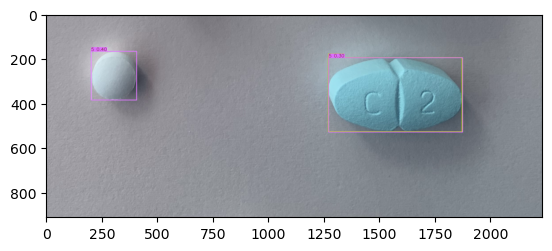

In [37]:
# Define path to test image
#image_test_path = 'C:/Users/admin/Documents/GitHub/Pill_Identification/train/images/3_MT_32.jpg'
image_test_path = 'C:/Users/admin/Documents/GitHub/Pill_Identification/test/images/image.png'

# Call predict methods
results = model.predict(source=image_test_path,
                        imgsz=2016)

# Plot the results
test_image = results[0].plot(line_width=2)
plt.imshow(test_image, cmap='gray')